**Project 5 — Predicting House Prices using Linear Regression**

Step 1: Import Libraries and Load Dataset

Import all required libraries and read the CSV file.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load Dataset
df = pd.read_csv("/content/Housing.csv")

In [ ]:
# Display first 5 rows
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Step 2: Explore Dataset

Check dataset info, columns, and data types.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
# Shape of dataset
print("Shape of dataset: ", df.shape)

Shape of dataset:  (545, 13)


In [ ]:
# Check for missing values
print("Missing values in each column:\n",df.isnull().sum())

Missing values in each column:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [ ]:
# Summary statistics
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


 Step 3: Data Cleaning and Conversion

 Convert categorical data to numeric and handle any missing values.

In [ ]:
# Convert 'yes'/'no' columns to 1/0
df = df.replace({'yes':1, 'no':0})
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,False,True
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,True,False
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,False,True
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,False,False


In [ ]:
# Convert categorical features like 'furnishingstatus' using one-hot encoding
df = pd.get_dummies(df, drop_first=True)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,False,True
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,True,False
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,False,True
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,False,False


In [ ]:
# Check dataset after conversion
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


Step 4: Visualize correlations between features

Plot heatmap to see correlations and relationships.

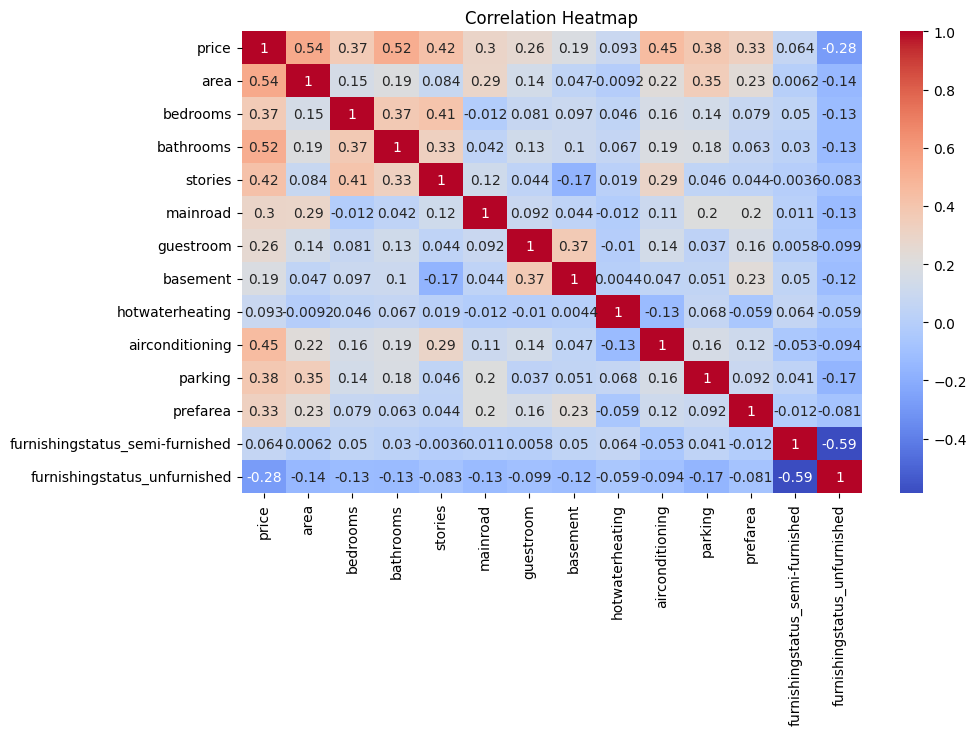

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Step 5: Define dependent (target) and independent (features) variables

Separate input features (X) and target variable (y).

In [ ]:
x = df.drop('price', axis=1)
y = df['price']

print("Features shape:", x.shape)
print("Target shape:", y.shape)

Features shape: (545, 13)
Target shape: (545,)


Step 6: Split data

Split dataset into training and testing parts.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)

Training set: (436, 13)
Testing set: (109, 13)


Step 7: Train Linear Regression Model

Fit Linear Regression model on training data.

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
print("✅ Model Training Completed Successfully!")

LinearRegression()
✅ Model Training Completed Successfully!


Step 8: Evaluate the Model

Predict values for test data and evaluate accuracy using MSE & R².

In [ ]:
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 1754318687330.6633
R-squared (R²): 0.6529242642153185


Step 9: Visualize Actual vs Predicted Prices

Plot actual vs predicted prices for comparison.

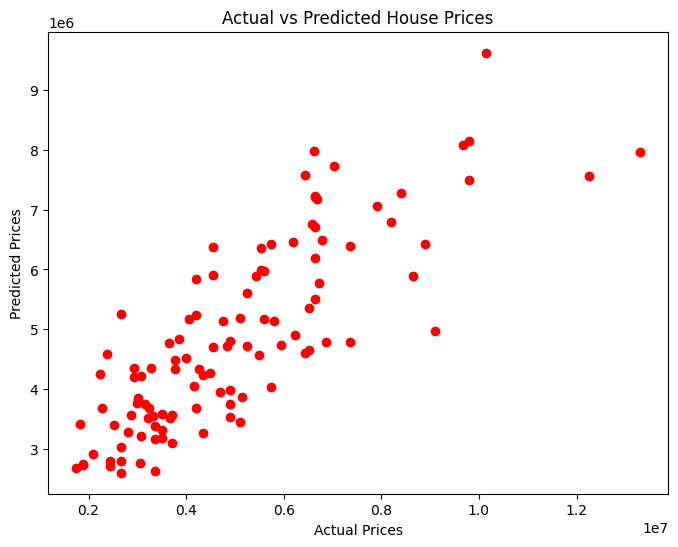

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='red')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

Step 10: Analyze Feature Importance

Check which features most influence house prices.

In [ ]:
coeff_df = pd.DataFrame(model.coef_, x.columns, columns=['Coefficient'])
coeff_df.sort_values(by='Coefficient', ascending=False)

,Coefficient
bathrooms,1.094445e+06
airconditioning,7.914267e+05
hotwaterheating,6.846499e+05
prefarea,6.298906e+05
stories,4.074766e+05
basement,3.902512e+05
mainroad,3.679199e+05
guestroom,2.316100e+05
parking,2.248419e+05
bedrooms,7.677870e+04


Step 11: Insights and Interpretation

Print some insights from analysis.

In [ ]:
print("🔹 Insights:")
print("1️. Larger area and more bedrooms increase house price.")
print("2️. Furnished houses tend to have higher prices.")
print("3️. Houses with better main road access also show higher value.")
print("4️. R² Score indicates how well the model explains variation in house prices.")
print("5️. Model can be improved by feature scaling or adding polynomial terms.")

🔹 Insights:
1️. Larger area and more bedrooms increase house price.
2️. Furnished houses tend to have higher prices.
3️. Houses with better main road access also show higher value.
4️. R² Score indicates how well the model explains variation in house prices.
5️. Model can be improved by feature scaling or adding polynomial terms.


Step 12: Save the trained model

Save model using joblib

In [ ]:
import joblib
joblib.dump(model, "linear_regression_house_model.pkl")
print("✅ Model saved as linear_regression_house_model.pkl")

✅ Model saved as linear_regression_house_model.pkl


Step 13: Test model on new sample data

Try predicting price for a new sample house

In [ ]:
sample_data = X_test.iloc[0].values.reshape(1, -1)
predicted_price = model.predict(sample_data)

print("Predicted Price for Sample House:", predicted_price[0])
print("Actual Price:", y_test.iloc[0])

Predicted Price for Sample House: 5164653.900339674
Actual Price: 4060000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
